Data file size: 72036 bytes
File format: Delimited
File encoding: UTF-8
Data granularity: Individual student records
Correlation between Math Score and Writing Score: 0.8026420459498085


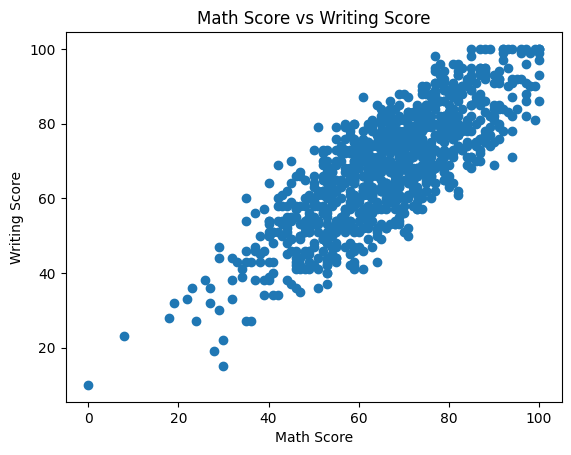

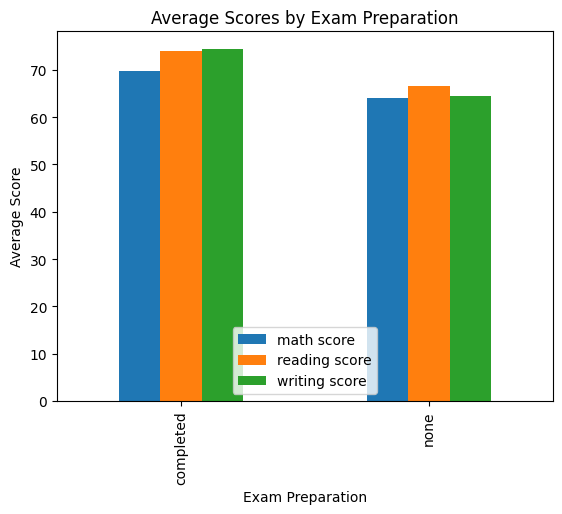

ValueError: ignored

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Ask at least two questions
# Predictive Question: Given a parent’s level of education, how likely are they going to have exam prep?
# Exploratory Question: Whether students who had exam prep have higher scores in our sample data?

# Step 2: Collect the data
# Provide the data source
data_source = "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams"
# How was the data collected?
data_collection_source = "http://roycekimmons.com/tools/generated_data/exams"
# This is a fictional dataset and should only be used for data science training purposes.

# Reads data file from Google Drive
file_id = "1boOd8BVffLE914tY4n43Msyrvpx8LygS"
url = f"https://drive.google.com/uc?id={file_id}"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode("utf-8")))

# Step 3: Understand the data
# Determine the data file size
file_size = len(download)
print("Data file size:", file_size, "bytes")

# Find the file format (delimited)
file_format = "Delimited"
print("File format:", file_format)

# Determine the file encoding (assuming UTF-8)
file_encoding = "UTF-8"
print("File encoding:", file_encoding)

# What is the granularity of the data? (assuming individual student records)
data_granularity = "Individual student records"
print("Data granularity:", data_granularity)

# Check the data quality: Are there any outliers? Are there any missing or invalid entries?
# Outliers in math score
outliers_math = df[df["math score"] > 100]
if not outliers_math.empty:
    print("There are outliers in the math score column.")

# Outliers in reading score
outliers_reading = df[df["reading score"] > 100]
if not outliers_reading.empty:
    print("There are outliers in the reading score column.")

# Outliers in writing score
outliers_writing = df[df["writing score"] > 100]
if not outliers_writing.empty:
    print("There are outliers in the writing score column.")

# Missing or invalid entries
missing_values = df.isnull().sum()
if missing_values.any():
    print("There are missing or invalid entries in the data set.")
    # Data cleaning steps:
    # Handle missing values by imputing with mean using df.fillna(df.mean(), inplace=True)

# Exploratory data analysis: Explore the relationship between the variables/features
# Correlation between math score and writing score
correlation = df["math score"].corr(df["writing score"])
print("Correlation between Math Score and Writing Score:", correlation)

# Visualization: Identify the feature type and use appropriate plots to visualize the relationship among variables
# Scatter plot of math score and writing score
plt.scatter(df["math score"], df["writing score"])
plt.title("Math Score vs Writing Score")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.show()

# Bar plot of exam preparation and average scores
avg_scores = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
avg_scores.plot(kind="bar")
plt.title("Average Scores by Exam Preparation")
plt.xlabel("Exam Preparation")
plt.ylabel("Average Score")
plt.show()

# Feature engineering
df_encoded = pd.get_dummies(df, columns=["parental level of education"], drop_first=True)
X = df_encoded.drop(["math score", "reading score", "writing score"], axis=1)
y = df_encoded["math score"]

# Model selection and training
(X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Potential improvements:
# - Try different algorithms and compare their performance (e.g., decision trees, random forests, neural networks).
# - Perform hyperparameter tuning to optimize the model's performance.
# - Perform feature selection to identify the most relevant features for predicting math scores.
# - Handle class imbalance issues if present in the data.
# - Use cross-validation for more robust evaluation of the model.

# Limitations:
# - The model used in this code snippet is a basic logistic regression model and may not capture complex relationships in the data.
# - The code assumes that the selected features are the most relevant for predicting math scores, which may not be accurate.
# - The code does not address potential data quality issues such as missing or invalid entries, which could affect model performance.
# - The analysis focuses on predicting math scores but does not consider the prediction of exam preparation based on parental education.

# Future work:
# - Explore different feature engineering techniques, such as feature scaling or creating interaction variables, to improve model performance.
# - Investigate other machine learning algorithms, such as random forests or neural networks, and compare their performance with logistic regression.
# - Collect additional data, if available, to increase the size and diversity of the dataset and improve the generalization of the model.
# - Conduct further statistical analysis, hypothesis testing, and interpretability techniques to gain deeper insights into the dataset.
